In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# TODO: 데이터 불러와서 확인하기
rocket = pd.read_csv('data/RocketLaunchDataCSV.csv')

In [3]:
rocket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          60 non-null     object 
 1   Date                          300 non-null    object 
 2   Time (East Coast)             59 non-null     object 
 3   Location                      300 non-null    object 
 4   Crewed or Uncrewed            60 non-null     object 
 5   Launched?                     60 non-null     object 
 6   High Temp                     299 non-null    float64
 7   Low Temp                      299 non-null    float64
 8   Ave Temp                      299 non-null    float64
 9   Temp at Launch Time           59 non-null     float64
 10  Hist High Temp                299 non-null    float64
 11  Hist Low Temp                 299 non-null    float64
 12  Hist Ave Temp                 299 non-null    float64
 13  Perci

In [4]:
rocket.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,NaN,04-Dec-58,NaN,Cape Canaveral,NaN,NaN,75.0,68.0,71.00,NaN,...,16.0,15.0,NaN,NaN,NaN,30.22,NaN,10:26,Cloudy,NaN
1,NaN,05-Dec-58,NaN,Cape Canaveral,NaN,NaN,78.0,70.0,73.39,NaN,...,14.0,10.0,NaN,NaN,NaN,30.2,NaN,10:26,Cloudy,NaN
2,Pioneer 3,06-Dec-58,1:45,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,NaN,NaN,30.25,NaN,10:25,Cloudy,NaN
3,NaN,07-Dec-58,NaN,Cape Canaveral,NaN,NaN,76.0,57.0,66.04,NaN,...,10.0,10.0,NaN,NaN,NaN,30.28,NaN,10:25,Partly Cloudy,NaN
4,NaN,08-Dec-58,NaN,Cape Canaveral,NaN,NaN,79.0,60.0,70.52,NaN,...,12.0,10.0,NaN,NaN,NaN,30.23,NaN,12:24,Partly Cloudy,NaN


In [10]:
rocket.isnull().sum().sort_values(ascending=False)

Hist Ave Sea Level Pressure     300
Hist Ave Visibility             300
Hist Ave Max Wind Speed         300
Notes                           297
Temp at Launch Time             241
Wind Speed at Launch Time       241
Time (East Coast)               241
Crewed or Uncrewed              240
Name                            240
Day Length                        2
Condition                         2
Max Wind Speed                    1
Visibility                        1
Ave Temp                          1
High Temp                         1
Low Temp                          1
Wind Direction                    1
Hist High Temp                    1
Percipitation at Launch Time      1
Hist Ave Temp                     1
Hist Low Temp                     1
Hist Ave Percipitation            1
Sea Level Pressure                1
Location                          0
Date                              0
Launched?                         0
dtype: int64

In [6]:
rocket['Launched?'].value_counts()

Launched?
Y    59
N     1
Name: count, dtype: int64

In [4]:
rocket['Launched?'] = rocket['Launched?'].fillna('N')

In [9]:
rocket['Launched?'].value_counts()

Launched?
N    241
Y     59
Name: count, dtype: int64

In [11]:
rocket['Location'].value_counts()

Location
Cape Canaveral    260
Kennedy            40
Name: count, dtype: int64

In [ ]:
# 사용하지 않을 컬럼 삭제 
# 전체가 누락된 컬럼 : 'Hist Ave Max Wind Speed','Hist Ave Visibility','Hist Ave Sea Level Pressure'
# 날씨와 무관한 컬럼 : 'Name','Date',Time (East Coast)','Location','Day Length','Notes', 'Sea Level Pressure'
# 종속변수 : 'Launched?'

In [5]:
rocket = rocket.drop(['Hist Ave Max Wind Speed','Hist Ave Visibility','Hist Ave Sea Level Pressure','Name','Date','Time (East Coast)','Location','Day Length','Notes', 'Sea Level Pressure'], axis=1)
rocket.head(2)

,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Condition
0,NaN,N,75.0,68.0,71.00,NaN,75.0,55.0,65.0,0.0,0.08,E,16.0,15.0,NaN,Cloudy
1,NaN,N,78.0,70.0,73.39,NaN,75.0,55.0,65.0,0.0,0.09,E,14.0,10.0,NaN,Cloudy


In [12]:
rocket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Crewed or Uncrewed            300 non-null    object 
 1   Launched?                     300 non-null    object 
 2   High Temp                     300 non-null    float64
 3   Low Temp                      300 non-null    float64
 4   Ave Temp                      300 non-null    float64
 5   Temp at Launch Time           300 non-null    float64
 6   Hist High Temp                300 non-null    float64
 7   Hist Low Temp                 300 non-null    float64
 8   Hist Ave Temp                 300 non-null    float64
 9   Percipitation at Launch Time  300 non-null    float64
 10  Hist Ave Percipitation        300 non-null    float64
 11  Wind Direction                300 non-null    object 
 12  Max Wind Speed                300 non-null    float64
 13  Visib

In [ ]:
# TODO: 결측치 처리및 문자열데이터 인코딩

In [ ]:
# 적당한 값으로 결측치 처리
# crewed = Uncrewed로
# Launche? = N
# Wind Direction = Unknown
# Condition = Cloudy
# 기타는 중앙값 또는 최빈값


In [24]:
rocket['High Temp'].median()

np.float64(82.0)

In [15]:
rocket['Crewed or Uncrewed'].value_counts()

Crewed or Uncrewed
Uncrewed    44
Crewed      16
Name: count, dtype: int64

In [7]:
rocket['Crewed or Uncrewed'] = rocket['Crewed or Uncrewed'].fillna('Uncrewed')
rocket['Crewed or Uncrewed'].value_counts()

Crewed or Uncrewed
Uncrewed    284
Crewed       16
Name: count, dtype: int64

In [8]:
rocket['Wind Direction'] = rocket['Wind Direction'].fillna('Unknown')
rocket['Wind Direction'].value_counts()

Wind Direction
E          80
W          54
NE         42
SE         38
S          28
NW         25
N          19
SW         13
Unknown     1
Name: count, dtype: int64

In [9]:
rocket['Condition'] = rocket['Condition'].fillna('Cloudy')
rocket['Condition'].value_counts()

Condition
Cloudy            115
Partly Cloudy      68
Fair               68
Rain               24
T-Storm            12
Thunder             7
Mostly Cloudy       2
Windy               1
Partly Cloudly      1
Light Rain          1
Heavy T-Storm       1
Name: count, dtype: int64

In [10]:
numerial_cols = rocket.select_dtypes(include='number').columns

In [11]:
for col in numerial_cols:
    median_value = rocket[col].median()
    rocket[col] = rocket[col].fillna(median_value)

In [ ]:
# rocket.fillna(rocket.median(numeric_only=True), inplace=True)
# rocket

In [31]:
rocket.isnull().sum()

Crewed or Uncrewed              0
Launched?                       0
High Temp                       0
Low Temp                        0
Ave Temp                        0
Temp at Launch Time             0
Hist High Temp                  0
Hist Low Temp                   0
Hist Ave Temp                   0
Percipitation at Launch Time    0
Hist Ave Percipitation          0
Wind Direction                  0
Max Wind Speed                  0
Visibility                      0
Wind Speed at Launch Time       0
Condition                       0
dtype: int64

In [13]:
# 문자데이터 인코딩
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
rocket['Crewed or Uncrewed'] = le.fit_transform(rocket['Crewed or Uncrewed'])
rocket['Wind Direction'] = le.fit_transform(rocket['Wind Direction'])
rocket['Condition'] = le.fit_transform(rocket['Condition'])

In [46]:
rocket.head(3)

,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Condition
0,1,0,75.0,68.0,71.00,77.0,75.0,55.0,65.0,0.0,0.08,0,16.0,15.0,10.0,0
1,1,0,78.0,70.0,73.39,77.0,75.0,55.0,65.0,0.0,0.09,0,14.0,10.0,10.0,0
2,1,1,73.0,0.0,60.21,62.0,75.0,55.0,65.0,0.0,0.09,2,15.0,10.0,11.0,0


In [42]:
rocket['Launched?'].value_counts()

Launched?
N    241
Y     59
Name: count, dtype: int64

In [ ]:
종속변수 Launched? 컬럼
Y -> 1, N -> 0

In [14]:
rocket['Launched?'] = rocket['Launched?'].map({'Y': 1, 'N': 0})

#### 모델만들기

In [20]:
# TODO: 데이터 분리하기
X_data = rocket.drop(columns=['Launched?'])
y_data = rocket['Launched?']

In [22]:
# TODO: 모델 만들고 성능 평가하기
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test =  train_test_split(X_data, y_data, test_size=0.2, random_state=10, stratify=y_data)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(240, 15) (60, 15) (240,) (60,)


In [52]:
dt = DecisionTreeClassifier(random_state=11)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [53]:
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

1.0
0.9833333333333333


In [54]:
y_pred = dt.predict(X_test)

In [55]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.92      0.96        12

    accuracy                           0.98        60
   macro avg       0.99      0.96      0.97        60
weighted avg       0.98      0.98      0.98        60



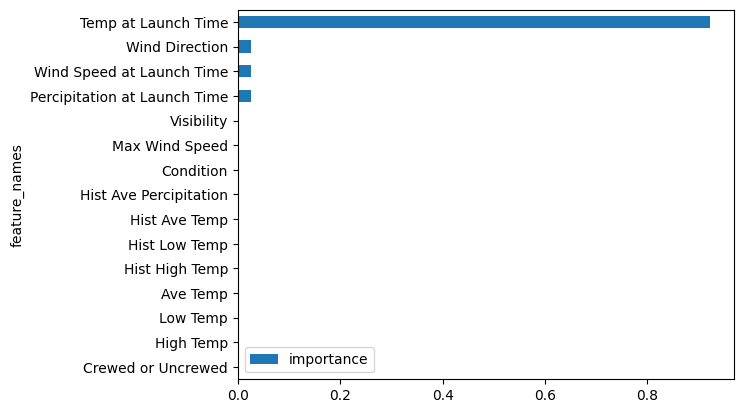

In [61]:
# plt.figure(figsize=(4,3))
# sns.barplot(y=dt.feature_names_in_,x = dt.feature_importances_)
df_result = pd.DataFrame()
df_result['feature_names'] = dt.feature_names_in_
df_result['importance'] = dt.feature_importances_
df_result.sort_values('importance').plot(kind='barh', x='feature_names')
plt.show()

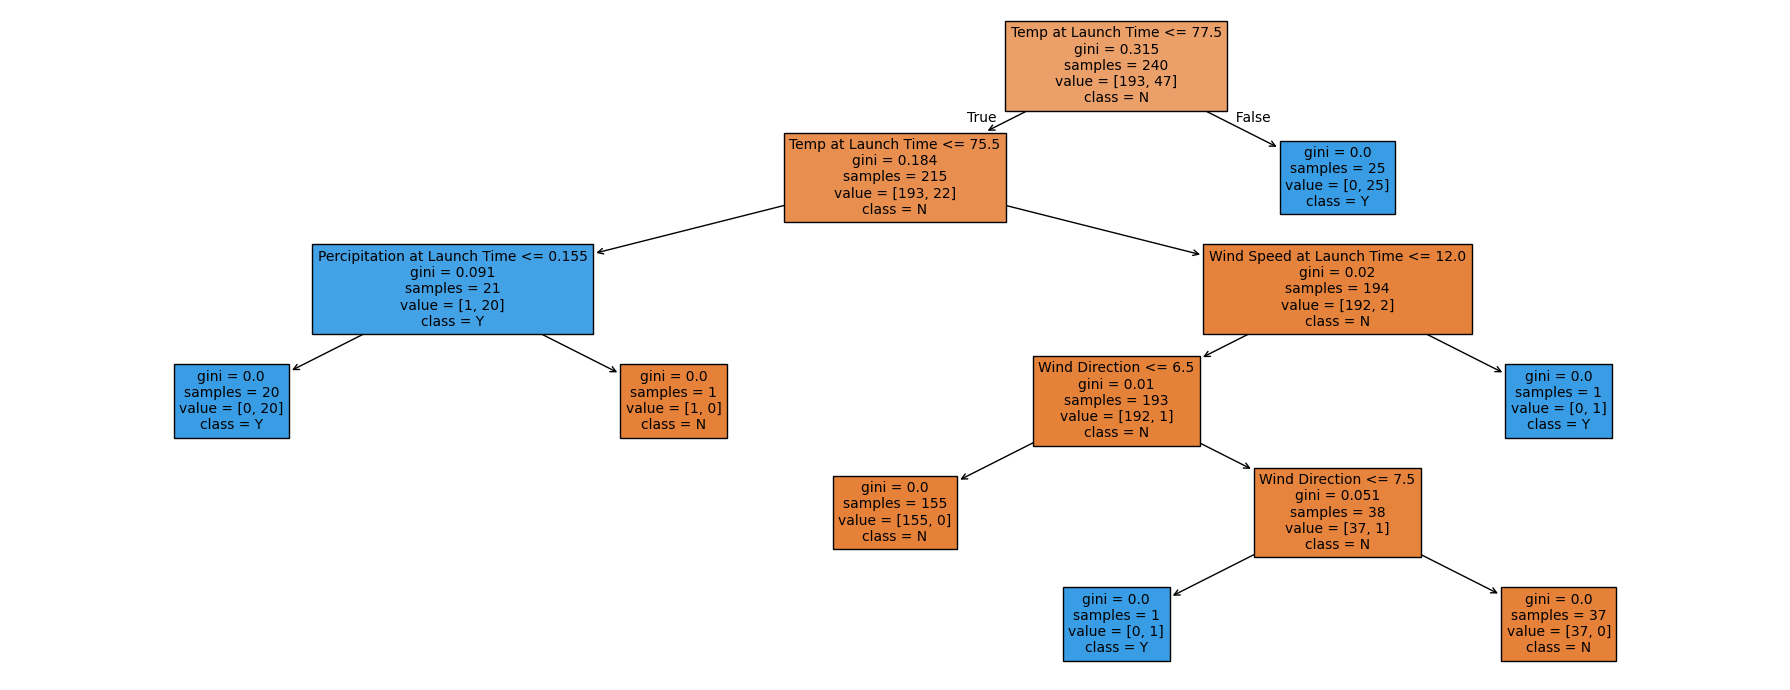

In [58]:
from sklearn.tree import plot_tree

plt.figure(figsize=(18, 7))
plot_tree(dt, feature_names= dt.feature_names_in_, class_names= ['N', 'Y'], filled=True) #  
plt.tight_layout()
plt.show()

In [ ]:
# plot_tree
# 특성중요도 시각화 feature_importances_
# 레포트 classification_report

In [17]:
# TODO: 모델 만들고 성능 평가하기
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

1.0
0.9666666666666667
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        48
           1       1.00      0.83      0.91        12

    accuracy                           0.97        60
   macro avg       0.98      0.92      0.94        60
weighted avg       0.97      0.97      0.97        60



In [ ]:
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [3, 5, 7, 10, None], # max_depth: 나무의 깊이를 제한하여 과적합 방지
    'min_samples_split': [2, 5, 10, 20], # min_samples_split: 노드를 분할하기 위해 필요한 최소 샘플 수
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy'] # criterion: 분할 품질을 측정하는 기능 ('gini' 또는 'entropy')
}

gscv = GridSearchCV(dt, param_grid=param_grid, cv=5, refit=True)
gscv.fit(X_train, y_train)

print(gscv.best_params_)

best_dt = gscv.best_estimator_
y_pred = best_dt.predict(X_test)

print(best_dt.score(X_train, y_train))
print(best_dt.score(X_test, y_test))
print(classification_report(y_test, y_pred))

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.9958333333333333
0.9666666666666667
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        48
           1       1.00      0.83      0.91        12

    accuracy                           0.97        60
   macro avg       0.98      0.92      0.94        60
weighted avg       0.97      0.97      0.97        60



In [154]:
out = f'''
compare DT ,RF, LR
DT : {gr_search.best_score_}
RF : {rf.score(X_test, y_test)}
LR : {lr.score(X_test, y_test)}

DT confusion matrix : 
{classification_report(y_test, gr_search.best_estimator_.predict(X_test))}

RF confusion matrix : 
{classification_report(y_test, y_pred_rf)}

LR confusion matrix : 
{classification_report(y_test, y_pred_lr)}
'''
print(out)


compare DT ,RF, LR
DT : 0.9833333333333332
RF : 0.9833333333333333
LR : 0.8666666666666667

DT confusion matrix : 
              precision    recall  f1-score   support

           N       1.00      0.98      0.99        49
           Y       0.92      1.00      0.96        11

    accuracy                           0.98        60
   macro avg       0.96      0.99      0.97        60
weighted avg       0.98      0.98      0.98        60


RF confusion matrix : 
              precision    recall  f1-score   support

           N       1.00      0.98      0.99        49
           Y       0.92      1.00      0.96        11

    accuracy                           0.98        60
   macro avg       0.96      0.99      0.97        60
weighted avg       0.98      0.98      0.98        60


LR confusion matrix : 
              precision    recall  f1-score   support

           N       0.87      0.98      0.92        49
           Y       0.80      0.36      0.50        11

    accuracy      